<a href="https://colab.research.google.com/github/MatheusSC017/IrisClassification_SKLearn/blob/main/IrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data

## Data Import
In this section we will import de Iris DataSet and convert it into a DataFrame Object from the pandas library. we will use the numeric target, where 0, 1 and 2 will represent 'Setosa', 'Versicolour' and 'Virginica' respectively

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
iris_data = load_iris()

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['iris'] = iris_data.targets
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data Clean/ Normalization
Checking the DataFrame we realize that the data does not have any null value, so let's skip the step of cleaning the data. Next, we will normalize the DataFrame with the StandardScaler that standardizes the scalers but keeps the data scatter

In [ ]:
# There aren't null values
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# The scale of the data is variable
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
normalized_data = ss.fit_transform(iris_data.data)
iris_df = pd.DataFrame(normalized_data, columns=iris_data.feature_names)
iris_df['iris'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


## Data analysis
In this step we will create a correlation map to verify the similarity of the features, analysing the results we verifythat 2 of the 4 features has a strong positive correlation 

In [ ]:
import seaborn as sb

In [ ]:
iris_corr = iris_df.drop('iris', axis=1).corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


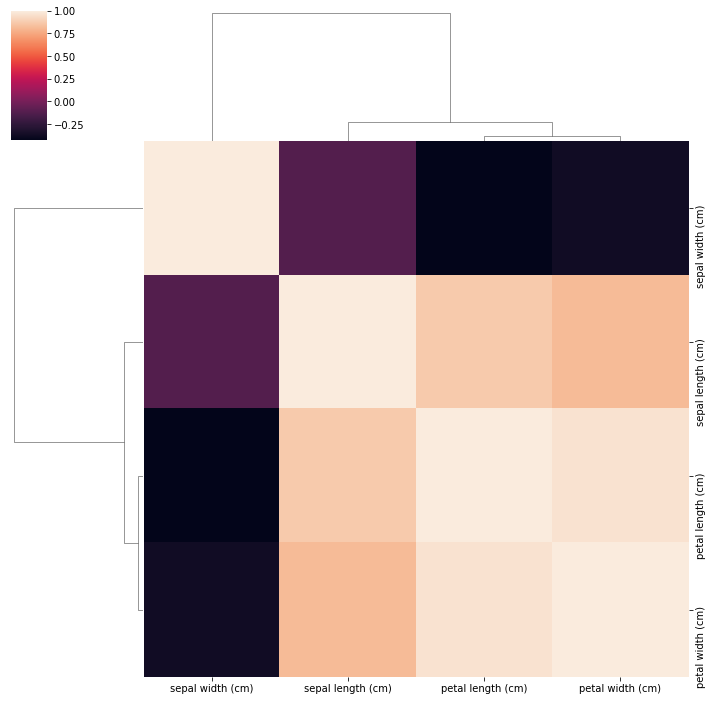

In [ ]:
sb.clustermap(iris_corr)

## Feature Selection
Next, we will use the SelectKBest class to select 3 features of the DataFrame to perform the training of our model

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_df.drop('iris', axis=1),
                                                    iris_df['iris'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
skb = SelectKBest(k=3)

In [ ]:
X_train = pd.DataFrame(
    skb.fit_transform(
        X_train, 
        Y_train
    ),
    columns=skb.get_feature_names_out()
)
X_train

,sepal length (cm),petal length (cm),petal width (cm)
0,-0.416010,-0.032966,-0.262387
1,0.553333,0.762758,0.395774
2,0.674501,0.990108,0.790671
3,0.916837,0.364896,0.264142
4,1.643844,1.331133,1.712096
...,...,...,...
100,0.310998,0.137547,0.132510
101,-1.143017,0.421734,0.659038
102,-0.052506,-1.453901,-1.315444
103,-0.052506,0.137547,0.000878


## Model Training
In this final step we will use the Classifier Class RandomForest to predict our data and verify the results through metrics how accuracy, precision and recall 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=20, max_depth=2)

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=20)

In [ ]:
pred = clf.predict(X_test[skb.get_feature_names_out()])

In [ ]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score
)

In [ ]:
print('Accuracy: ', accuracy_score(Y_test, pred))
print('Precision: ', precision_score(Y_test, pred, average='micro'))
print('Recall: ', recall_score(Y_test, pred, average='micro'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = pd.DataFrame(confusion_matrix(Y_test, pred), 
                      index=[name + ' Pred' for name in iris_data.target_names],
                      columns=[name + ' Real' for name in iris_data.target_names])
matrix

,setosa Real,versicolor Real,virginica Real
setosa Pred,19,0,0
versicolor Pred,0,13,0
virginica Pred,0,0,13
